# Исследование надежности заемщиков

## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируем библиотеку pandas. Считаем данные из csv-файла в датафрейм и сохраним в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
import pandas as pd # импортируем библиотеку pandas
import seaborn

In [2]:
data = pd.read_csv('datasets\\data.csv') # прочитаем csv-файл

**Задание 2. Выведем первые 20 строчек датафрейма `data` на экран.**

In [3]:
print(data.head(20))

    Unnamed: 0  children  days_employed  dob_years            education  \
0            0         1   -8437.673028         42               высшее   
1            1         1   -4024.803754         36              среднее   
2            2         0   -5623.422610         33              Среднее   
3            3         3   -4124.747207         32              среднее   
4            4         0  340266.072047         53              среднее   
5            5         0    -926.185831         27               высшее   
6            6         0   -2879.202052         43               высшее   
7            7         0    -152.779569         50              СРЕДНЕЕ   
8            8         2   -6929.865299         35               ВЫСШЕЕ   
9            9         0   -2188.756445         41              среднее   
10          10         2   -4171.483647         36               высшее   
11          11         0    -792.701887         40              среднее   
12          12         0 

**Задание 3. Выведем основную информацию о датафрейме с помощью метода `info()`.**

In [4]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        21525 non-null  int64  
 1   children          21525 non-null  int64  
 2   days_employed     19351 non-null  float64
 3   dob_years         21525 non-null  int64  
 4   education         21525 non-null  object 
 5   education_id      21525 non-null  int64  
 6   family_status     21525 non-null  object 
 7   family_status_id  21525 non-null  int64  
 8   gender            21525 non-null  object 
 9   income_type       21525 non-null  object 
 10  debt              21525 non-null  int64  
 11  total_income      19351 non-null  float64
 12  purpose           21525 non-null  object 
dtypes: float64(2), int64(6), object(5)
memory usage: 2.1+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведем количество пропущенных значений для каждого столбца. Используем комбинацию двух методов.**

In [5]:
print(data.isna().sum())

Unnamed: 0             0
children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64


**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце мы обработаем на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [6]:
total_income_median = data.groupby('income_type')['total_income'].median()
for inc_type in data['income_type'].unique():
    data.loc[(data['income_type'] == inc_type) & (data['total_income'].isna() == True),'total_income'] = total_income_median[inc_type]



### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. Таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработаем значения в этом столбце: заменим все отрицательные значения положительными с помощью метода `abs()`.**

In [7]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведем медианное значение трудового стажа `days_employed` в днях.**

In [8]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставим их как есть. Тем более этот столбец не понадобится нам для исследования.

**Задание 8. Выведем перечень уникальных значений столбца `children`.**

In [9]:
print(data['children'].unique()) 

[ 1  0  3  2 -1  4 20  5]


**Задание 9. В столбце `children` есть два аномальных значения. Удалим строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [10]:
data = data.loc[data['children'] != -1]
data = data.loc[data['children'] != 20]

**Задание 10. Ещё раз выведем перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [11]:
print(data['children'].unique())

[1 0 3 2 4 5]


### Удаление пропусков (продолжение)

**Задание 11. Заполним пропуски в столбце `days_employed` медианными значениями по каждому типу занятости `income_type`.**

In [12]:
days_employed_median = data.groupby('income_type')['days_employed'].median()

for  unique_income_type in data['income_type'].unique(): # цикл по уникальным значениям стобца income_type
# ищем строки со значением в столбце income_type = unique_income_type и нулевым значением. присваем значение соответствующей типу деятельности медианы    
    data.loc[(data['income_type'] == unique_income_type) & (data['days_employed'].isna()==True), 'days_employed'] = days_employed_median[unique_income_type] 
    

**Задание 12. Убедимся, что все пропуски заполнены. Проверим себя и ещё раз выведем количество пропущенных значений для каждого столбца с помощью двух методов.**

In [13]:
print(data.isna().sum())

Unnamed: 0          0
children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64


### Изменение типов данных

**Задание 13. Заменим вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [14]:
data['total_income'] = data['total_income'].astype(int)

### Категоризация данных

**Задание 14. Выведем на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалим их.**

In [15]:
# посчитаем дубликаты
print(data.duplicated().sum())

0


In [16]:
# удалим дубликаты
data = data.drop_duplicates()

**Задание 15. Обработаем неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведем их к нижнему регистру. Проверим остальные столбцы.**

In [17]:
data['education'] = data['education'].str.lower()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создадим в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [18]:
# создадим функцию categorize_income()
def categorize_income(row):
    if row <= 30000:
        return 'E'
    if row <= 50000:
        return 'D'
    if row <= 200000:
        return 'C'
    if row <= 1000000:
        return 'B'
    return 'A' 

In [19]:
# применим функцию методом apply()
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведем на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [20]:
print(data['purpose'].unique())

['покупка жилья' 'приобретение автомобиля' 'дополнительное образование'
 'сыграть свадьбу' 'операции с жильем' 'образование'
 'на проведение свадьбы' 'покупка жилья для семьи' 'покупка недвижимости'
 'покупка коммерческой недвижимости' 'покупка жилой недвижимости'
 'строительство собственной недвижимости' 'недвижимость'
 'строительство недвижимости' 'на покупку подержанного автомобиля'
 'на покупку своего автомобиля' 'операции с коммерческой недвижимостью'
 'строительство жилой недвижимости' 'жилье'
 'операции со своей недвижимостью' 'автомобили' 'заняться образованием'
 'сделка с подержанным автомобилем' 'получение образования' 'автомобиль'
 'свадьба' 'получение дополнительного образования' 'покупка своего жилья'
 'операции с недвижимостью' 'получение высшего образования'
 'свой автомобиль' 'сделка с автомобилем' 'профильное образование'
 'высшее образование' 'покупка жилья для сдачи' 'на покупку автомобиля'
 'ремонт жилью' 'заняться высшим образованием']


**Задание 18. Создим функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используем собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучим данные в столбце `purpose` и определим, какие подстроки помогут нам правильно определить категорию.**

In [21]:
# создадим функцию categorize_purpose()
def categorize_purpose(row):
    if 'авто' in row:
        return 'операции с автомобилем'
    elif ('недвижим' in row) or ('жил' in row):
        return 'операции с недвижимостью'
    elif 'свадьб' in row:
        return 'проведение свадьбы'
    else:
        return 'получение образования'

In [22]:
# применим функцию методом apply()

data['purpose_category'] = data['purpose'].apply(categorize_purpose)

## Исследуйте данные и ответьте на вопросы

**Задание 19. Есть ли зависимость между количеством детей и возвратом кредита в срок?**

In [23]:
# создадим функцию для расчета процента клиентов, которые не вернули кредит по выбранной категории, которую передаем, как значение. 
def no_repayment_of_debt(data, category):
    total_credits = data[category].value_counts().rename("total_credits") # считаем общее количество выданных кредитов в выбранной категории
    debt_credits = data[data.debt == 1].groupby(category)['debt'].count().rename("debt_credits") # считаем количество кредитов, которые не вернули в выбранной категрии
    ratio = (debt_credits / total_credits).fillna(0).rename("ratio") # считаем соотношение количества не возвратов к количеству выданных кредитов
    return pd.concat([total_credits, debt_credits, ratio], axis=1)
   

ratio_children = no_repayment_of_debt(data, 'children') # обращаемся к  no_repayment_of_debt по показателю количества детей
ratio_children

,total_credits,debt_credits,ratio
0,14149,1063.0,0.075129
1,4818,444.0,0.092154
2,2055,194.0,0.094404
3,330,27.0,0.081818
4,41,4.0,0.097561
5,9,NaN,0.000000


In [24]:
# adsa = data.pivot_table(index='children', values='debt', aggfunc=['count', 'sum'])
# adsa['per'] = adsa['sum'] / adsa['count']
# adsa

<AxesSubplot:>

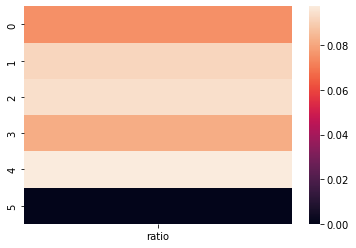

In [25]:
seaborn.heatmap(pd.DataFrame(ratio_children['ratio'])) # выводим графическое отображение полученных данных

**Вывод:** 
    <p>Можно сказать, что клиенты, у которых нет детей имею наименьший процент не возвращенных кредитов 7,5%. При этом на эту категорию приходится самое больше количество выданных кредитов, что позволяет утверждать о точности сделанного вывода. </p>
    В целом клиенты, у которых есть дети имеют, приблизительно, одинаковые показатели 9,2% - 9,8%. 
    Исключением являются клиенты у которых 5 детей (100% возврат кредитов), но количество таких клиентов небольшое и поэтому накопленных данных мало для каких-то выводов.

**Задание 20. Есть ли зависимость между семейным положением и возвратом кредита в срок?**

,total_credits,debt_credits,ratio
женат / замужем,12302,927,0.075354
гражданский брак,4160,385,0.092548
Не женат / не замужем,2799,273,0.097535
в разводе,1189,84,0.070648
вдовец / вдова,952,63,0.066176


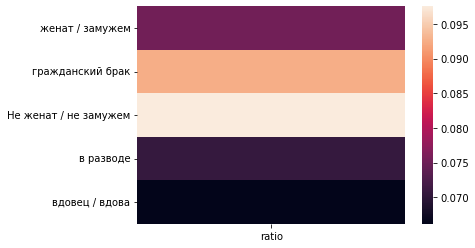

In [26]:
ratio_family_status = no_repayment_of_debt(data, 'family_status') # # обращаемся к  no_repayment_of_debt по показателю 'family_status'

seaborn.heatmap(pd.DataFrame(ratio_family_status['ratio'])) # выводим графическое отображение полученных данных
ratio_family_status

**Вывод:** 
    <p>Самый маленький процент не возвращенных кредитов в категории вдовец/вдова 6,6%. При этом в этой категории меньше всего выданных кредитов и точность вычислений может быть ниже чем у остальных категорий. </p>   
    <p>В категориях "в разводе" и "женат / замужем" приблизительно одинаковые показатели 7% - 7,5%. В категории "женат / замужем" более 12 тысяч выданных кредитов, что превосходит сумму кредитов выданных по всем остальным категориям. Из этого можно сделать вывод, что имено клиенты из этой группы могут быть наиболее интересны.</p>
    <p>Самые высокие показатели не возвращенных кредитов в котегориях "Не женат / не замужем" и "Не женат / не замужем"  9,2% - 9,8% </p></div>

**Задание 21. Есть ли зависимость между уровнем дохода и возвратом кредита в срок?**

,total_credits,debt_credits,ratio
C,15992,1353,0.084605
B,5014,354,0.070602
D,349,21,0.060172
A,25,2,0.080000
E,22,2,0.090909


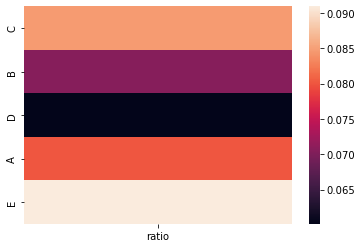

In [27]:
ratio_total_income_category = no_repayment_of_debt(data, 'total_income_category') # # обращаемся к  no_repayment_of_debt по показателю 'total_income_category'

seaborn.heatmap(pd.DataFrame(ratio_total_income_category['ratio'])) # выводим графическое отображение полученных данных
ratio_total_income_category



**Вывод:** 
    <p>У клиентов из групп А и В ("высокий доход") процент не возвращенных кредитов колеблется между 7% и 8%. При этом в категории А всего 25 выданных кредитов и, как следствие, точно может быть не высокой. </p>
    <p>Самый высокий процент не возвращенных кредитов у клиентов из группы Е ("низкий доход"). Но и выданных кредитов всего 22 штуки, что, в принципе, ожидаемо. Так как при низких доходов есть большие риски, что клиент будет своевременно выполнять свои обязательства.</p>
    <p>При этом, было бы не лишним изучить данные показатели в разрезе сумм, которые были получены в кредит в соотношении к сумме среднего дохода каждой категории.</p></div>

**Задание 22. Как разные цели кредита влияют на его возврат в срок?**

,total_credits,debt_credits,ratio
операции с недвижимостью,10780,780,0.072356
операции с автомобилем,4288,400,0.093284
получение образования,3997,369,0.092319
проведение свадьбы,2337,183,0.078306


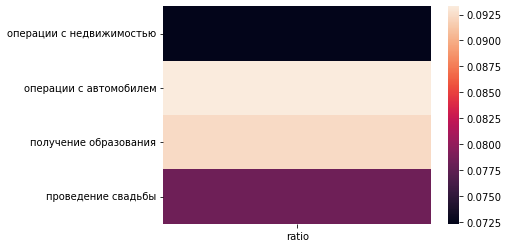

In [28]:
ratio_purpose_category = no_repayment_of_debt(data, 'purpose_category')

seaborn.heatmap(pd.DataFrame(ratio_purpose_category['ratio'])) # выводим графическое отображение полученных данных
ratio_purpose_category

**Вывод:** 
    <p>Максимальный процент не возвращенных кредитов при покупке автомобилей и получении образования 9,2% - 9,3%. </p>  
    <p>Самый маленький процент не возвращенных кредитов при операциях с недвижимостью 7,2%. При этом в этой категории выдана, практически, половина из всех выданных кредитов.</p></div>

**Задание 23. Приведите возможные причины появления пропусков в исходных данных.**

*Ответ:* Причины, по которым в исходных данных могут быть пропуски:
1. Не заполнение анкетных данных клиентами.
2. Не корректное заполнение анкетных данных.
3. Ошибки при обработке информации.
4. Попытки скрыть или искозить информацию.

**Задание 24. Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.**

*Ответ:* При заполнениями пропущенных данных "0" есть большой риск получить отклонение от общей картины, так как на месте пропусков могли быть значимые величины. При заполнении данных средними арифмитическими, можно столкнуть с наличием в данных аномально больших или аномально маленьких показателей, которые так же могут значительно повлиять на конечный результат. Медианный значения позволяют минимизировать возможные отклонения от средних показателей и обеспечивают максимальную информативность.

## Общий вывод

   <p> "Портрет" идеального клиента для банка: 
        <p>- без детей,</p>
        <p>- женат / замужем,</p>
        <p>- с доходом от 30000 до 50000,</p> 
        <p>- берет кредит для операций с недвизимостью. </p>
    <p>Нужно не забывать, что в данном исследовании не анализировалась информация в разрезе суммы кредита, времени, на которое берется кредит и ряда других показателей, которые так же могли повлиять на портрет идеального клиента. </p>
    <p>Так же, хотелось бы дополнительно отметить, что данные собирались по клиентам, которым банк уже выдал кредит, а значит они уже прошли какой-то анализ и соответствовали каким-то критериям. Возможно за рамками этого отбора остались категории клиентов, которые бы так же "успешно" выполняли свои кредитные обязательства) </p>